In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns; 
from scipy import stats
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [50]:
train = pd.read_csv("data/train_clean.csv", sep=',')
test = pd.read_csv("data/test_clean.csv", sep =',')
enfant = train.where(train['Age']< 16).dropna()

### Faire un test d’hypothèse pour savoir si oui ou non, les enfants ont été privilégiés lors du naufrage.

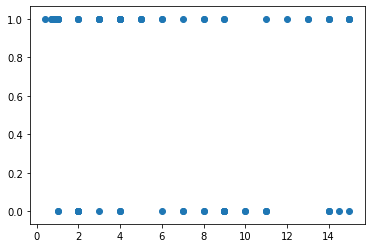

In [3]:
plt.scatter(enfant['Age'], enfant['Survived'])

H0 : Il n'éxiste pas de correlation entre la survie et le fais detre agée de moin de 18 ans <br>
h1 : Il éxiste une corrélations entre la survie et le fais d'etre agé de moin de 18 ans 

### Selon un test d'Anova: 

In [4]:
Anova = ols('Survived ~ Age', data=enfant).fit()
Anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.885
Date:                Tue, 07 Apr 2020   Prob (F-statistic):              0.174
Time:                        18:50:09   Log-Likelihood:                -57.908
No. Observations:                  83   AIC:                             119.8
Df Residuals:                      81   BIC:                             124.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6909      0.091      7.595      0.000       0.510       0.872
Age           -0.0158      0.011     -1.373      0.174      -0.039       0.007
==============================================================================
Omnibus:                     1244.197   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.634
Skew:                          -0.347   Prob(JB):                      0.00181
Kurtosis:                       1.219   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
table = sm.stats.anova_lm(Anova)
table

,df,sum_sq,mean_sq,F,PR(>F)
Age,1.0,0.456588,0.456588,1.885409,0.17351
Residual,81.0,19.615701,0.242169,NaN,NaN


#### La Pvalue est de 0.174 >0.05, on ne peut pas réfutez l'hypothese nulle, H0 est accepté

<h3>Test T de Student </h3>

In [6]:
scipy.stats.ttest_rel(enfant['Age'], enfant['Survived'])

Ttest_relResult(statistic=10.90409465584013, pvalue=1.2541974095067611e-17)

##### la Pvalue est inferieur a 0.05, on réfute l'hypothese nul

In [51]:
newval = ''
for index , i in train.iterrows():
    if i['Age'] >18:
        newval = 0
    else :
        newval = 1
    train.at[index,'Age'] = newval

H0 : Il n'éxiste pas de correlation entre la survie et le fais detre agée de moin de 18 ans , elle sont indépendantes.<br>
h1 : Il éxiste une corrélations entre la survie et le fais d'etre agé de moin de 18 ans 

In [58]:
from scipy.stats import chi2_contingency
contingence = pd.crosstab(train['Age'],train['Survived'],  margins=True)
chi2, p, dof, ex = chi2_contingency(contingence)

In [59]:
alpha = 1.0 - 0.95
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

significance=0.050, p=0.041
Dependent (reject H0)


### La Pvalue est de 0.041, soit en dessous de notre alpha de 0.05, Nous rejetons h0, et nous confirmons que Les 2 features sont liées.